<a href="https://colab.research.google.com/github/sreeproject/AI-/blob/main/Yet_another_copy_of_Real_Estate_Investment_ML_Submission_Template_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    :-   Real Estate Investment Advisor: Predicting Property Profitability & Future Value







##### **Project Type**    - EDA/Regression/Classification/Supervised
##### **Contribution**    - Individual

# **Project Summary -**

to develop a comprehensive machine learning application to assist potential investors in making informed real estate decisions. The system will perform two primary functions: first, it will classify properties as either a “Good Investment” or not, helping investors quickly identify high-potential opportunities. Second, it will predict the estimated property price after five years, providing a forward-looking valuation to support strategic investment planning.
The project will begin with thorough data preprocessing and exploratory analysis on the provided real estate dataset. This includes handling missing values, encoding categorical variables, normalizing numerical features, and visualizing trends to uncover key patterns. Feature engineering will be applied to create additional variables that capture critical property and market characteristics, improving model performance.
Multiple machine learning models will be developed and evaluated for both classification and regression tasks. Model training and evaluation metrics will be tracked using MLflow to ensure reproducibility and facilitate comparison between experiments. Finally, a user-friendly Streamlit application will be deployed, allowing users to input property details, receive investment recommendations, and visualize predicted price growth over time, along with interactive insights such as heatmaps and trend charts.

# **GitHub Link -**

https://github.com/sreeproject/AI-/blob/main/Another_copy_of_Yet_another_copy_of_EMI_ML_Submission_Template_2.ipynb

# **Problem Statement**


Develop a machine learning application to assist potential investors in making real estate decisions. The system should:

Classify whether a property is a "Good Investment" (Classification).

Predict the estimated property price after 5 years (Regression).

Use the provided dataset to preprocess and analyze the data, engineer relevant features, and deploy a user-interactive application using Streamlit that provides investment recommendations and price forecasts. MLflow will be used for experiment tracking.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
real_df = pd.read_csv('india_housing_prices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
real_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
real_df.shape

### Dataset Information

In [ ]:
# Dataset Info
real_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Duplicated values:",real_df.duplicated().sum())

There is no dupicted values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Missing values:", real_df.isnull().sum().sum())

In [ ]:
real_df

### What did you know about your dataset?

Dataset contains 23 columns and 2,50,000 entries are there.It contains no duplicate values and missing values. The variabes are 'ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'.Want to create 2 target variabes. Classification target variable is Good_Investment' and the regression target variable is 'Future_Price_5Y'.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
real_df.columns

In [ ]:
real_df.dtypes

In [ ]:
# Step 4. Identify Data Types
# ------------------------------------------------------------
num_cols = real_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = real_df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f" Numeric columns: {len(num_cols)}")
print(f" Categorical columns: {len(cat_cols)}")

In [ ]:
print(f" Numeric columns:{num_cols}")
print(f"Categorcal columns:{cat_cols}")

In [ ]:
# Dataset Describe
real_df.describe()

### Variables Description

ID - Unique identifier for each property record

State - State where the property is located

City - City of the property

Locality - Specific neighborhood or locality

Property_Type - Type of property (Apartment, Villa, House, etc.)

BHK - Number of bedrooms, hall, kitchen

Size_in_SqFt - Area of the property in square feet

Price_in_Lakhs - Price of the property in lakhs (local currency)

Price_per_SqFt - Price divided by area; normalized price metric

Year_Built - Year when the property was constructed

Furnished_Status - Furnishing level (Unfurnished, Semi, Fully)

Floor_No - Floor number of the property

Total_Floors - Total number of floors in the building

Age_of_Property - Age of the property (Current Year - Year_Built)

Nearby_Schools - Number or rating of nearby schools

Nearby_Hospitals - Number of nearby hospitals

Public_Transport_Accessibility - Access to buses/metro/train

Parking_Space - Number of parking spots available

Security - Security features (Gated, CCTV, Guard)

Amenities - Amenities available (Gym, Pool, Clubhouse)

Facing - Direction the property faces (North, South, etc.)

Owner_Type - Owner type (Individual, Builder, Agent)

Availability_Status - Current status (Available, Under Construction, Sold)

2 target variables.

For Classification : Target: Good_Investment - shows if a property is likely to yield high returns.

For Regression : Target: Future_Price_5Y - predicts the estimated property price after five years.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
real_df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

####Feature Engineering

In [ ]:
real_df1 = real_df.copy()

In [ ]:
real_df1.head(1)

In [ ]:
real_df1['Price_per_SqFt'] = real_df1['Price_in_Lakhs'] / real_df1['Size_in_SqFt']

In [ ]:
#School count available in dataset
if 'Nearby_Schools' in real_df.columns:
    real_df1['School_Density_Score'] = real_df1['Nearby_Schools'] / real_df1['Size_in_SqFt']
else:
    real_df1['School_Density_Score'] = 0  # default if missing#

In [ ]:
# Map 'Public_Transport_Accessibility' to numerical values before comparison
accessibility_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
real_df1['Public_Transport_Accessibility_Numeric'] = real_df1['Public_Transport_Accessibility'].map(accessibility_mapping)

Create new 3 features 'Price_per_SqFt','School_Density_Score','Public_Transport_Accessibility_Numeric'

In [ ]:
median_price = real_df1['Price_in_Lakhs'].median()
median_pps = real_df1['Price_per_SqFt'].median()


In [ ]:
#PRICE SCORE (0–3)

#Cheaper than median → better investment

real_df1['Price_Score'] = real_df1['Price_in_Lakhs'].apply(
    lambda x: 3 if x <= median_price else 1
)

In [ ]:
#PRICE PER SQFT SCORE (0–3)

#Lower cost per sqft → better

real_df1['PPS_Score'] = real_df1['Price_per_SqFt'].apply(
    lambda x: 3 if x <= median_pps else 1
)

In [ ]:
#BHK SCORE (0–2)

#3 BHK and above have better long-term resale value

real_df1['BHK_Score'] = real_df1['BHK'].apply(
    lambda x: 2 if x >= 3 else 1
)

In [ ]:
#READY-TO-MOVE SCORE (0–2)

#Assuming:

#Availability_Status = 1 → Ready to Move

#Availability_Status = 0 or 2 → Under Construction

real_df1['RTM_Score'] = real_df1['Availability_Status'].apply(
    lambda x: 2 if x == 1 else 1
)

In [ ]:
#Total Investment Score

#Maximum = 3 + 3 + 2 + 2 = 10

real_df1['Investment_Score'] = (
    real_df1['Price_Score'] +
    real_df1['PPS_Score'] +
    real_df1['BHK_Score'] +
    real_df1['RTM_Score']
)

In [ ]:
#Score ≥ 7 ⇒ Good Investment (1)

#Score < 7 ⇒ Not Good (0)

real_df1['Good_Investment'] = real_df1['Investment_Score'].apply(
    lambda x: 1 if x >= 7 else 0
)

Create 6 new features.'Price_Score','PPS_Score',BHK_Score,'RTM_Score','Investment_Score' and 'Good_Investment'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns that need encoding for the Investment_Score calculation
# 'Public_Transport_Accessibility' already has 'Public_Transport_Accessibility_Numeric'
categorical_for_investment_score = ['Locality', 'Amenities', 'Facing', 'Security', 'Parking_Space']

# Apply Label Encoding to convert them to numerical types
# This creates new _Encoded columns which will be used in the calculation
for col in categorical_for_investment_score:
    if col in real_df1.columns and real_df1[col].dtype == 'object':
        le = LabelEncoder()
        real_df1[col + '_Encoded'] = le.fit_transform(real_df1[col])
    # If the column is already numeric or missing, no action is needed here

real_df1['Investment_Score'] = (
    (real_df1['Locality_Encoded'] * 0.25) + # Use the newly encoded column
    (real_df1['Amenities_Encoded'] * 0.20) + # Use the newly encoded column
    (real_df1['Public_Transport_Accessibility_Numeric'] * 0.15) + # Use the numeric version
    (real_df1['Nearby_Schools'] * 0.15) + # This is already numeric
    (real_df1['Nearby_Hospitals'] * 0.10) + # This is already numeric
    ((real_df1['Facing_Encoded'] + real_df1['Security_Encoded'] + real_df1['Parking_Space_Encoded']) * 0.15) # Use encoded versions
)


In [ ]:
#Assign Base Appreciation Rate by City
city_growth = {
    "Mumbai": 8,
    "Bangalore": 9,
    "Hyderabad": 10,
    "Pune": 7,
    "Delhi": 6,
    "Chennai": 6,
    "Kolkata": 5,
    "Other": 4
}

def get_city_growth(city):
    return city_growth.get(city, 4)   # default = 4%

In [ ]:
#Calculate Appreciation Rate using weighted formula
real_df1['Estimated_Appreciation_Rate'] = (
    real_df1['City'].apply(get_city_growth) +     # base city growth
    0.3 * real_df1['BHK'] +
    0.10 * real_df1['Amenities_Encoded'] +                           # better amenities → higher growth
    0.15 * real_df1['Security_Encoded'] +                            # safe locality grows more
    0.08 * real_df1['Public_Transport_Accessibility_Numeric'] +      # metro, buses, etc.
    0.05 * real_df1['Nearby_Schools'] +                      # good for resale
    0.05 * real_df1['Nearby_Hospitals'] -                    # healthcare improves value
    0.20 * real_df1['Age_of_Property']                       # older properties appreciate slower
)

In [ ]:
real_df1['Estimated_Appreciation_Rate'] = real_df1['Estimated_Appreciation_Rate'].clip(2, 12)

In [ ]:
# Create Future Price after 5 years using compound appreciation
real_df1['Future_Price_5Y'] = real_df1['Price_in_Lakhs'] * (1 + real_df1['Estimated_Appreciation_Rate'] / 100) ** 5

Add 3 more features. They are  'Estimated_Appreciation_Rate','Future_Price_5Y' and 'Public_Transport_Accessibility_Numeric'
       

In [ ]:
real_df1.head(1)

In [ ]:
real_df1.columns

In [ ]:
real_df1.shape

In [ ]:
real_df1.isnull().sum().sum()

###Handling missing values

####There is no missing values now

Now datasets size has changed now it contains 38 columns above it was 23.

In [ ]:
real_df1.columns

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Education,montly rent,credit score,bank_balance and emergency_fund contain more than 30% of missing values. Here can't drop credit score,bank_balance columns. So i drop variables containg more than 80% of missing values . so drop Education,montly rent,emergency_fund and handle credit_score,bank_balance with fillna(.median) method

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

 Exploratory Data Analysis (EDA)

#### Chart - 1

In [ ]:
#Price Trends by City
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=real_df1, x='City', y='Price_in_Lakhs')
plt.title("Price Trends by City")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The graph is a boxplot visualization comparing price distributions (measured in Lakhs) across a wide range of Indian cities, with values spanning from 0 to 500.It reveals a highly unusual and uniform pattern where every single city displays nearly identical median prices (around 250 Lakhs), interquartile ranges, and minimum/maximum values.

##### 2. What is/are the insight(s) found from the chart?

The primary insight is the complete lack of correlation between city and price, as every single location displays an identical price distribution with a median of approximately 250 Lakhs.
Statistical consistency is absolute across the board, with all cities sharing the same interquartile ranges and extending across the full minimum-to-maximum span of 0 to 500 Lakhs.
This unnatural uniformity strongly suggests the dataset is synthetic or randomly generated, as real-world data would invariably show significant price disparities between major metropolitan hubs (like Mumbai) and smaller towns.

#### Chart - 2

In [ ]:
from typing_extensions import reveal_type
#Correlation Between Area & Investment Return
#use the Investment Score (or Good_Investment label you created).

plt.figure(figsize=(8,6))
sns.scatterplot(x='Size_in_SqFt', y='Good_Investment', data=real_df1)
plt.title("Area vs Investment Return (Good Investment)")
plt.show()

# If using investment score
sns.scatterplot(x='Size_in_SqFt', y='Investment_Score', data=real_df1)

##### 1. Why did you pick the specific chart?

1.The chart plots property size (in square feet, ranging from approximately 500 to 5,000) against a binary outcome variable called "Good_Investment," which takes only two values: 0 (Not a Good Investment) and 1 (A Good Investment).
 All data points are clustered strictly at the 0 and 1 lines on the vertical axis, showing that for every size property, there are both good and not-good investment outcomes.

2.This chart plots the size of a property (in square feet) against an "Investment Score" (ranging from 0 to 200).

Key Observation: The data points are perfectly scattered across the entire range of both the X-axis (Size) and the Y-axis (Investment Score), showing a dense, uniform cloud.

##### 2. What is/are the insight(s) found from the chart?

1.The primary insight from this chart is that property size has no correlation with the binary outcome of being a "Good_Investment" (1) or not (0).
For every size between 500 and 5,000 square feet, data points exist for both good and not-good investment outcomes.

2.This scatter plot shows that the Investment Score (ranging from 0 to 200) is completely uniform and random across all property sizes.
The data forms a dense, undifferentiated cloud, indicating a near-zero correlation between the size of the property and its assigned Investment Score.

#### Chart - 3

In [ ]:
#Impact of Crime Rate on Good Investment

#crime_rate column, we create it using:

#Synthetic Crime Score

#Based on locality, density, amenities:

real_df1['Crime_Rate'] = (
    (500 - real_df1['Locality_Encoded']) * 0.4 + # Use encoded numeric column
    (10 - real_df1['Security_Encoded']) * 0.4 +   # Use encoded numeric column
    (5 - real_df1['Public_Transport_Accessibility_Numeric']) * 0.2 # Use numeric column
)


#Higher = worse.

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Good_Investment', y='Crime_Rate', data=real_df1)
plt.title("Crime Rate Impact on Good Investment Classification")
plt.show()

Properties with low crime rates → mostly Good Investment = 1

High crime zones → mostly Good Investment = 0

Median difference shows strongest effect

##### 1. Why did you pick the specific chart?

This box plot compares the distribution of Crime Rate (on the Y-axis) for properties classified as a Not Good Investment (0) versus those classified as a Good Investment (1).Both classifications show virtually identical statistical distributions, meaning the median crime rate, the interquartile range (the box), and the overall range (the whiskers) are the same regardless of the "Good_Investment" status.

##### 2. What is/are the insight(s) found from the chart?

The primary insight from this box plot is that the Crime Rate has no discernible impact on whether a property is classified as a Good Investment or a Not Good Investment.
This conclusion is based on the two distributions (for '0' and '1') being virtually identical, sharing the same median (around 105) and interquartile range (approximately 55 to 155).
Therefore, Crime Rate is not a relevant factor or predictor used to determine the "Good Investment" classification within this specific dataset

#### Chart - 4

Relationship Between Infrastructure Score & Resale Value

In [ ]:
real_df1['Infrastructure_Score'] = (
    real_df1['Nearby_Schools']*0.25 +
    real_df1['Nearby_Hospitals']*0.25 +
    real_df1['Public_Transport_Accessibility_Numeric']*0.20 +
    real_df1['Amenities_Encoded']*0.20 +
    real_df1['Facing_Encoded']*0.10
)

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=real_df1, x='Infrastructure_Score', y='Price_per_SqFt')
plt.title("Infrastructure Score vs Resale Value")
plt.show()

##### 1. Why did you pick the specific chart?

This chart plots the Infrastructure Score (ranging from 0 to 70) against the Price per SqFt (Resale Value, normalized from 0 to 1).
The data points are uniformly and densely scattered across the entire plot, forming a rectangular cloud that spans the full range of both variables.

##### 2.What is/are the insight(s) found from the chart?

The overarching insight is that all variables tested—City, Property Size, Crime Rate, and Infrastructure Score—show zero correlation with the investment-related outcomes (Price, Investment Score, Resale Value, or Good Investment classification).
This consistent pattern of dense, uniform scatter plots and identical box plots strongly suggests that the dataset is synthetic (randomly generated), as real-world data would exhibit clear correlations and disparities between variables.

#### Chart - 5

In [ ]:
real_df1['Good_Investment'].value_counts(normalize=True) * 100

In [ ]:
import matplotlib.pyplot as plt

# Calculate percentage distribution
values = real_df1['Good_Investment'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=values.index, autopct='%1.1f%%')
plt.title('Good_Investment Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

The Pie Chart confirms the target variable, Good_Investment, is nearly balanced (52.1% Good, 47.9% Not Good), suggesting an even chance of either outcome.

#### Chart - 6

In [ ]:
sns.histplot(real_df1['Estimated_Appreciation_Rate'], bins=20)
plt.title("Estimated Appreciation Rate Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

The histogram for Estimated Appreciation Rate is highly skewed with the vast majority of data points clustered around 12, suggesting a heavily favored or set appreciation rate.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
#Future Price vs Current Price
sns.scatterplot(x=real_df1['Price_in_Lakhs'], y=real_df1['Future_Price_5Y'])
plt.xlabel("Current Price (Lakhs)")
plt.ylabel("Future Price (Lakhs) - 5 Years")
plt.title("Current vs Future Price")
plt.show()

##### 1. Why did you pick the specific chart?

High Correlation/Uniformity: The "Current vs Future Price" chart shows a strong, positive, and linear relationship, but the "Estimated Appreciation Rate" is heavily clustered at $12\%$, suggesting a set, non-variable growth factor for most properties.

#### Correlation Heatmap

In [ ]:
 #Correlation Heatmap
# ---------------------------------------------------------------
plt.figure(figsize=(12,8))
corr = real_df1.corr(numeric_only=True)
sns.heatmap(corr, cmap='crest', annot=False)
print("matrix: ",corr)
plt.title("Feature Correlation Matrix")
plt.show()

##### 1. Why did you pick the specific chart?

The correlation matrix shows that Price_in_Lakhs is strongly positively correlated with Size_in_SqFt and
Price_per_SqFt, indicating that larger properties and higher unit prices drive overall property value.

 Investment_Score and Good_Investment are positively correlated with infrastructure, amenities, public transport accessibility, and future price, highlighting their importance for investment decisions.

 Negative or weak correlations with Crime_Rate and Age_of_Property suggest that higher crime and older properties tend to reduce price and investment attractiveness.

####  Pair Plot

##### 1. Why did you pick the specific chart?

The graph shows pairwise relationships between monthly salary, credit score, and current EMI amount, color-coded by EMI eligibility status. Individuals marked as Eligible tend to have higher salaries and credit scores, clustering in favorable regions. High_Risk and Not_Eligible groups are more dispersed, often associated with lower financial metrics. The diagonal KDE plots reveal that monthly salary and credit score have skewed distributions, while EMI amounts vary more broadly.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for pairplot
num_cols =real_df1.select_dtypes(include=['int64', 'float64']).columns

# Create pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(real_df1[num_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features (After Cleaning)', y=1.02)
plt.show()

This pair plot shows the pairwise relationships and distributions of all numeric features, where diagonal plots represent each feature’s distribution and off-diagonal plots show how two features interact. Clear linear patterns between size, price, and price per sq ft indicate strong positive relationships, while scattered plots suggest weak or no correlation among many other variables. The vertical and horizontal banding seen in some plots reflects discrete or encoded features, such as scores or categorical variables converted to numbers.

In [ ]:
real_df1['RTM_Score'].nunique()

In [ ]:
real_df1.columns

In [ ]:
real_df1.shape

Now datasets contains 40 columns above it was 38

In [ ]:
corr = real_df1.corr(numeric_only=True)
print("Correlation matrix:", corr)

#### Identify highly correlated pairs (|corr| = 0.80)

In [ ]:
threshold = 0.70

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

high_corr_drop = [column for column in upper.columns if any(upper[column].abs() >= threshold)]

print("Highly correlated columns to drop:")
print(high_corr_drop)

In [ ]:
realhp_df =real_df1.copy()

In [ ]:
realhp_df.shape

In [ ]:
realhp_df = realhp_df.drop(columns=['Age_of_Property',
                                   'Price_Score',
                                   'BHK_Score',
                                   'Crime_Rate',
                                   'Estimated_Appreciation_Rate',
                                   'Infrastructure_Score'])

Drop some highly correlated features 'Age_of_Property',
                                   'Price_Score',
                                   'BHK_Score',
                                   'Crime_Rate',
                                   'Estimated_Appreciation_Rate',
                                   'Infrastructure_Score'

In [ ]:
realhp_df.shape

In [ ]:
realhp_df = realhp_df.drop(columns=['Investment_Score','PPS_Score','RTM_Score'])

Again drop 'Investment_Score','PPS_Score' and 'RTM_Score' features.

In [ ]:
print("\nRemaining columns:")
realhp_df.columns

In [ ]:
realhp_df['Future_Price_5Y']


In [ ]:
realhp_df.head(5)

In [ ]:
realhp_df.shape

Now dataset shape has changed. The dataset contains 31 columns

###Price & Size Analysis


1.What is the distribution of property prices?


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(real_df1['Price_in_Lakhs'], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()

The histogram shows the distribution of property prices in lakhs, with most price bins having similar counts, indicating a fairly uniform distribution.

The KDE (smooth line) confirms that there are no extreme spikes or major skews, suggesting that properties are evenly spread across the price range.

The distribution implies that all price ranges from low to high have comparable representation, which is useful for training a regression model without bias toward any particular price range.

2.What is the distribution of property sizes?


In [ ]:
#Plot the Size Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(real_df1['Size_in_SqFt'], bins=50, kde=True)
plt.title("Distribution of Property Sizes")
plt.xlabel("Size (Sq. Ft.)")
plt.ylabel("Count")
plt.show()

Uniform Distribution: The most striking feature is the near-uniformity of the bars. The count (frequency) for properties across the entire range of sizes (from approximately 500 Sq. Ft. to 5,000 Sq. Ft.) is consistently high, hovering around 5,000.

No Clear Mode or Skew: Unlike a normal distribution, there is no single prominent peak (mode). The data is not skewed to the left or right, indicating that very large and very small properties are nearly as common as medium-sized properties within this dataset's boundaries.

3.How does price per sq ft vary by property type?

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=real_df1, x='BHK', y='Price_per_SqFt')
plt.title("Price per SqFt by Property Type (BHK)")
plt.xlabel("Property Type (BHK)")
plt.ylabel("Price per SqFt")
plt.show()

The box plot showing the distribution of Price per SqFt for properties with 1 to 5 Bedrooms, Hall, and Kitchen (BHK), here are the two key takeaways:Consistent Median Price: The central line inside the box, which represents the median (50th percentile) Price per SqFt, is highly consistent across all property types (1 BHK through 5 BHK). This suggests that the typical price efficiency (price per unit area) does not significantly change as the number of rooms increases, with the median value for all groups being slightly under $0.1$.Similar Outlier Range and Variability: All property types exhibit a large number of outliers (the individual points above the whiskers) which extend the maximum recorded Price per SqFt close to $1.0$. The interquartile range (the height of the box itself, representing the middle 50% of the data) is also very narrow and similar across all BHK types, indicating that the bulk of the Price per SqFt data is tightly clustered near the low end for every property size.

4.Is there a relationship between property size and price?

Yes — you can check the relationship between property size (sq ft) and price using correlation and scatter plots.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=real_df1, x='Size_in_SqFt', y='Price_in_Lakhs')
plt.title("Relationship Between Property Size and Price")
plt.show()

real_df1[['Size_in_SqFt','Price_in_Lakhs']].corr()

No Correlation Between Size and Price (Scatter Plot): The scatter plot titled "Relationship Between Property Size and Price" shows data points uniformly covering the entire plot area, from 500 Sq. Ft. to 5,000 Sq. Ft. (X-axis) and from 0 Lakhs to 500 Lakhs (Y-axis). This indicates that there is no discernible linear or non-linear correlation between the size of a property and its price in this dataset. A small property can be expensive, and a large property can be inexpensive.

5.Are there any outliers in price per sq ft or property size?

Yes — you can detect outliers in price per sq ft and property size using statistical methods like IQR or visualization.


In [ ]:
import numpy as np

# Calculate price per sqft if not already present
real_df1["price_per_sqft"] = real_df1["Price_in_Lakhs"] / real_df1["Size_in_SqFt"]

# IQR method
Q1 = real_df1["price_per_sqft"].quantile(0.25)
Q3 = real_df1["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_pps =real_df1[(real_df1["price_per_sqft"] < lower) | (real_df1["price_per_sqft"] > upper)]
outliers_pps.shape

###Location-based Analysis


6.What is the average price per sq ft by state?


In [ ]:
real_df1["price_per_sqft"] = real_df1["price_per_sqft"] / real_df1["Size_in_SqFt"]
avg_pps_by_state = real_df1.groupby("State")["price_per_sqft"].mean().sort_values(ascending=False)
avg_pps_by_state

In [ ]:
import matplotlib.pyplot as plt

avg_pps_by_state.plot(kind="bar", figsize=(12,5))
plt.ylabel("Average Price per Sq Ft")
plt.title("Average Price per Sq Ft by State")
plt.xticks(rotation=45)
plt.show()

The bar chart titled "Average Price per Sq Ft by State" shows that the average Price per Sq Ft is extremely consistent across all the listed states (Karnataka, Andhra Pradesh, Tamil Nadu, Assam, etc.).

All states have an average value clustered tightly around 0.00010 on the Y-axis. This suggests that, on average, the price efficiency of the properties in this dataset is remarkably similar regardless of the state.

7.What is the average property price by city?

In [ ]:
avg_price_by_city = real_df1.groupby("City")["Price_in_Lakhs"].mean().sort_values(ascending=False)
avg_price_by_city

In [ ]:
import matplotlib.pyplot as plt

avg_price_by_city.plot(kind='bar', figsize=(14, 6))
plt.title("Average Property Price by City")
plt.ylabel("Average Price")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

The bar charts for "Average Price per Sq Ft by State" and "Average Property Price by City" show an extremely high degree of uniformity. Average prices and average price-per-square-foot are nearly identical across almost all states and cities listed (clustered around 0.00010 for Sq Ft and 250 for Average Price).

8.What is the median age of properties by locality?


In [ ]:
median_age_by_locality = (
    real_df1.groupby("Locality")["Age_of_Property"]
      .median()
      .sort_values()
)
median_age_by_locality

In [ ]:
import matplotlib.pyplot as plt

median_age_by_locality.plot(kind='bar', figsize=(14, 6))
plt.title("Median Age of Properties by Locality")
plt.ylabel("Median Age (Years)")
plt.xlabel("Locality")
plt.xticks(rotation=45)
plt.show()

The bar chart "Median Age of Properties by Locality" shows that the median age of properties in this dataset is generally high, with the vast majority falling between 17.5 years and 18.5 years.However, there is a clear distinction: some localities have a median age as low as $\approx 17$ years, while others have a median age peaking at $\approx 20$ years. This suggests property turnover or new construction rates differ significantly across the various localities.

9.How is BHK distributed across cities?

In [ ]:
bhk_city_dist = (
    real_df1.groupby(["City", "BHK"])
      .size()
      .reset_index(name="Count")
      .sort_values(["City", "BHK"])
)
bhk_city_dist


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.countplot(data=real_df1, x="City", hue="BHK")
plt.title("Distribution of BHK Across Cities")
plt.xlabel("City")
plt.ylabel("Count of Properties")
plt.legend(title="BHK")
plt.xticks(rotation=45)
plt.show()

Based on the bar charts showing the "Distribution of BHK Across Cities," here is a three-point explanation:
Dominance of Larger Properties (3, 4, and 5 BHK):
In almost every city, the counts for 3 BHK, 4 BHK, and 5 BHK properties (darker shades) are significantly higher than the counts for 1 BHK and 2 BHK properties (lighter shades).
Across most cities, the 3 BHK, 4 BHK, and 5 BHK categories each have counts consistently clustered around 1,200 to 1,350 properties.
Lower Counts for Smaller Properties (1 and 2 BHK):
The 1 BHK and 2 BHK properties consistently have the lowest counts in most cities, typically falling between 800 and 1,200. The 1 BHK category often has the lowest count of all five.

This indicates that the dataset is heavily weighted toward larger, multi-room properties.

Cities with Exceptionally Low Overall Counts (e.g., Nagpur, Bangalore, Indore):

While most cities show high counts (all types above 1000), certain cities, like Nagpur, Bangalore, and Lucknow, exhibit noticeably lower total counts and a flatter distribution, with some categories dropping to approximately 800 properties.

Conversely, cities like Durgapur and Sikar have some of the highest counts, with several categories exceeding 1,300.

10.What are the price trends for the top 5 most expensive localities?


In [ ]:
top5_localities = (
    real_df1.groupby("Locality")["Price_in_Lakhs"]
      .mean()
      .sort_values(ascending=False)
      .head(5)
      .index
)
top5_localities

In [ ]:
df_top5 = real_df1[real_df1["Locality"].isin(top5_localities)]

price_trends = (
    df_top5.groupby(["Locality", "Year_Built"])["Price_in_Lakhs"]
           .mean()
           .reset_index()
)
df_top5.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=price_trends, x="Year_Built", y="Price_in_Lakhs", hue="Locality", marker="o")
plt.title("Price Trends for Top 5 Most Expensive Localities")
plt.xlabel("Year_Built")
plt.ylabel("Average Price")
plt.legend(title="Locality")
plt.grid(True)
plt.show()

The line chart displays the average price trends for five of the most expensive localities over several decades, based on the Year_Built of properties. The data shows significant volatility in average prices across all localities, with frequent, sharp peaks and troughs from year to year, indicating a highly dynamic market. Notably, the most expensive locality in a given year often shifts, with Locality_366 reaching the highest peak around 2011 and prices in Locality_395 and Locality_203 spiking toward the end of the timeline.

 ###Feature Relationship & Correlation


11.How are numeric features correlated with each other?

In [ ]:
# select numeric columns
numeric_df = real_df1.select_dtypes(include=['int64', 'float64'])

# correlation matrix
corr_matrix = numeric_df.corr()

# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

12.How do nearby schools relate to price per sq ft?


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(x=real_df1['Nearby_Schools'], y=real_df1['Price_per_SqFt'])
plt.title("Nearby Schools vs Price per Sq Ft")
plt.xlabel("Number of Nearby Schools")
plt.ylabel("Price per Sq Ft")
plt.show()

The scatter plot, titled Nearby Schools vs Price per Sq Ft, shows the relationship between the number of schools near a property (from 1 to 10) and its price per square foot. The data points are vertically distributed across the entire range of 'Price per Sq Ft' for every 'Number of Nearby Schools' category, indicating no clear correlation between the number of nearby schools and the property's price per square foot.

In [ ]:
corr = real_df1['Nearby_Schools'].corr(real_df1['Price_per_SqFt'])
print("Correlation:", corr)

13.How do nearby hospitals relate to price per sq ft?


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=real_df1['Nearby_Hospitals'],
    y=real_df1['Price_per_SqFt']
)
plt.title("Nearby Hospitals vs Price per Sq Ft")
plt.xlabel("Number of Nearby Hospitals")
plt.ylabel("Price per Sq Ft")
plt.show()

The scatter plot, titled Nearby Hospitals vs Price per Sq Ft, displays the relationship between the number of nearby hospitals (ranging from 1 to 10) and the property's price per square foot. The vertical spread of data points across the full range of 'Price per Sq Ft' for every 'Number of Nearby Hospitals' category indicates there is no clear correlation between the number of nearby hospitals and the property's price per square foot.

In [ ]:
corr = real_df1['Nearby_Hospitals'].corr(real_df1['Price_per_SqFt'])
print("Correlation:", corr)

14.How does price vary by furnished status?


In [ ]:
real_df1.groupby('Furnished_Status')['Price_per_SqFt'].mean()

In [ ]:
import matplotlib.pyplot as plt

avg_price = real_df1.groupby('Furnished_Status')['Price_per_SqFt'].mean()

plt.figure(figsize=(7,5))
avg_price.plot(kind='bar')
plt.title("Average Price per Sq Ft by Furnished Status")
plt.xlabel("Furnished Status")
plt.ylabel("Average Price per Sq Ft")
plt.show()

The bar chart illustrates the Average Price per Square Foot across three categories of Furnished Status: Furnished, Semi-furnished, and Unfurnished.
The chart demonstrates that the average price per square foot is nearly the same for all three furnished statuses, clustering just above 0.12.

15.How does price per sq ft vary by property facing direction?


In [ ]:
real_df1.groupby('Facing')['Price_per_SqFt'].mean().sort_values(ascending=False)

In [ ]:
avg_facing_price = real_df1.groupby('Facing')['Price_per_SqFt'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
avg_facing_price.plot(kind='bar')
plt.title("Average Price per Sq Ft by Property Facing Direction")
plt.xlabel("Facing Direction")
plt.ylabel("Average Price per Sq Ft")
plt.show()

The bar chart illustrates the Average Price per Sq Ft by Property Facing Direction for West, South, North, and East facing properties. The data shows that the average price per square foot is virtually identical for all four property facing directions, clustering just above 0.12. This suggests that, in this specific market, the direction a property faces is not a statistically significant factor in determining its average price per square foot.

###Investment / Amenities / Ownership Analysis


16.How many properties belong to each owner type?


In [ ]:
real_df1['Owner_Type'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

owner_counts = real_df1['Owner_Type'].value_counts()

plt.figure(figsize=(8,5))
owner_counts.plot(kind='bar')
plt.title("Number of Properties by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Number of Properties")
plt.show()

The bar chart titled Number of Properties by Owner Type shows the distribution of property listings among three categories: Broker, Owner, and Builder. The number of properties listed by all three owner types is nearly identical, each clustering around 85,000 properties. This indicates a balanced market where brokers, individual owners, and builders contribute almost equally to the total property listings.

17.How many properties are available under each availability status?

In [ ]:
real_df1['Availability_Status'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

availability_counts = real_df1['Availability_Status'].value_counts()

plt.figure(figsize=(8,5))
availability_counts.plot(kind='bar')
plt.title("Number of Properties by Availability Status")
plt.xlabel("Availability Status")
plt.ylabel("Number of Properties")
plt.show()


18.Does parking space affect property price?

In [ ]:
#Average Price by Parking Availability
real_df1.groupby('Parking_Space')['Price_in_Lakhs'].mean()

In [ ]:
#Average Price per Sq Ft by Parking
real_df1.groupby('Parking_Space')['Price_per_SqFt'].mean()

In [ ]:
import matplotlib.pyplot as plt

parking_price = real_df.groupby('Parking_Space')['Price_per_SqFt'].mean()

plt.figure(figsize=(6,4))
parking_price.plot(kind='bar')
plt.title("Price per Sq Ft vs Parking Availability")
plt.xlabel("Parking Available")
plt.ylabel("Average Price per Sq Ft")
plt.show()

he bar chart, titled Number of Properties by Availability Status, shows the distribution of listed properties across Under_Construction and Ready_to_Move categories. The number of properties in both categories is almost exactly the same, each exceeding 120,000 properties. This balanced distribution suggests the market has an equal supply of newly built, yet-to-be-completed properties and completed, immediately habitable properties.

19.How do amenities affect price per sq ft?

In [ ]:
real_df.groupby('Amenities')['Price_per_SqFt'].mean()

In [ ]:
import matplotlib.pyplot as plt

amenity_price = real_df1.groupby('Amenities')['Price_per_SqFt'].mean()

plt.figure(figsize=(6,4))
amenity_price.plot(kind='bar')
plt.title("Price per Sq Ft vs Amenities")
plt.xlabel("Amenities Available")
plt.ylabel("Average Price per Sq Ft")
plt.show()

The bar chart, titled Price per Sq Ft vs Amenities, displays the average price per square foot across numerous different amenity combinations. The average price per square foot for all displayed amenity groups is highly consistent, generally clustering around 0.13. This consistent pricing suggests that, for the properties analyzed, the presence or absence of specific amenities does not significantly impact the average price per square foot.

20.How does public transport accessibility relate to price per sq ft or investment potential?


In [ ]:
real_df1.groupby('Public_Transport_Accessibility')['Price_per_SqFt'].mean()

In [ ]:
import matplotlib.pyplot as plt

transport_price = real_df1.groupby('Public_Transport_Accessibility')['Price_per_SqFt'].mean()

plt.figure(figsize=(6,4))
transport_price.plot(kind='bar')
plt.title("Price per Sq Ft vs Public Transport Accessibility")
plt.xlabel("Distance to Public Transport")
plt.ylabel("Average Price per Sq Ft")
plt.show()

The bar chart, titled Price per Sq Ft vs Public Transport Accessibility, displays the average price per square foot across three categories of distance to public transport: High, Low, and Medium. The average price per square foot is nearly identical for all three levels of accessibility, clustering just above 0.12. This uniformity suggests that the average price per square foot in this market is not significantly influenced by the proximity or accessibility of public transportation.

## ***6. Feature Engineering & Data Pre-processing***

###Feature Engineering Summary

In [ ]:
numerical_features = realhp_df.select_dtypes(include=['int64','float64']).columns.tolist()
#categorical_features =emi_pred_df1.select_dtypes(include=['object','category']).columns.tolist()
print("numerical features:", numerical_features)
#print("categorical_features:", categorical_features )

Since Label Encoding and Standard Scaling have already been applied, all feature values are now numeric

### 1. Handling Missing Values

There is no missing values in the datasets

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x= numerical_features, color='skyblue')
plt.title('Boxplot for Good_Investment')
plt.show()

This is a Boxplot for the variable emi_eligibility, which is used to visually represent the distribution of the data. The box itself spans the Interquartile Range (IQR), showing where the middle 50% of the emi_eligibility values lie. The vertical line inside the box marks the median (the 50th percentile), which appears to be near the center of the IQR, suggesting a relatively symmetrical distribution. The whiskers extend to the minimum and maximum observed data points that are not considered outliers, indicating the full range of emi_eligibility values is quite wide.

### 3. Categorical Encoding

Already done above

In [ ]:
cat_cols = realhp_df.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols)

In [ ]:
realhp_df.dtypes

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoder is used. Label Encoder is used to convert categorical data into numeric form because machine learning algorithms require numerical inputs. It assigns each unique category a distinct integer value. This method is efficient and helps preserve memory since it doesn't create extra columns like one-hot encoding. However, it may introduce a false sense of order between categories if they are not ordinal.

### 4. Feature Manipulation & Selection

Now the dataset's column shape has changed . Now it has 28 columns

#### 1. Feature Manipulation

alredy explain above

#### 2. Feature Selection

Already explained above

##### What all feature selection methods have you used  and why?

Correlation Analysis:
I computed the correlation matrix to identify highly correlated features. Features with correlation values greater than 70% were dropped to reduce multicollinearity and simplify the model without losing essential information.


Feature Engineering Evaluation:
After creating new features, I assessed their relevance and removed derived features that overlapped or were highly correlated with existing ones, ensuring the model remains efficient.


By combining correlation-based filtering with domain-driven evaluation, the final feature set balances accuracy and interpretability.

##### Which all features you found important and why?

The features found important were age, gender, marital_status, monthly_salary, employment_type

years_of_employment, company_type, house_type, family_size

school_fees, college_fees, travel_expenses, existing_loans

credit_score, bank_balance, emi_scenario, requested_amount, requested_tenure, emi_eligibility

Derived Features: max_monthly_emi, emi_to_income_ratio, loan_to_income_ratio, loan_per_month, credit_risk_score

Interaction Features: salary_credit_interaction, employment_income_interaction, emi_expense_interaction, loan_emi_interaction

#Classifiction Train/Test Split

In [ ]:
#TRAIN/TEST SPLIT
# Features + Target
X = realhp_df.drop(columns=["Good_Investment","ID","Future_Price_5Y"])   # Features
y = realhp_df["Good_Investment"]

In classification, the target value is "Good_Investment"

Here i drop "Future_Price_5Y",which is the regression target value

In [ ]:
# Splits for ML training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

I used an 80:20 train-test split ratio to ensure a good balance between training and evaluation. The 80% training data allows the model to learn effectively, while the 20% test data provides a reliable measure of how well the model generalizes to unseen data. This ratio is widely used in practice and works well for medium to large datasets.

In [ ]:
X_train.shape,y_train.shape

In [ ]:
X_test.shape,y_test.shape

In [ ]:
#Scale numeric features (for Logistic Regression only)

#Random Forest & XGBoost do NOT require scaling.

from sklearn.preprocessing import StandardScaler

numeric_cols = X.select_dtypes(include=['int64','float64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [ ]:
#ENCODING & SCALING PIPELINE
# ===============================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ])

###Find out top features using RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Encode target y (string → numeric)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Keep only numeric features
X_numeric = X.select_dtypes(include=np.number)

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_numeric, y_encoded)

# Extract feature importance
importances = pd.Series(rf.feature_importances_, index=X_numeric.columns)

# Top 15 features
top_features = importances.nlargest(15)

# Final feature set
X_final = X_numeric[top_features.index]

print("✅ Final shape for model training:", X_final.shape)
print("✅ Selected top features:\n", list(X_final.columns))

In [ ]:
X_final.columns

In [ ]:
plt.figure(figsize=(8, 6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

In [ ]:
clasreg_df= pd.DataFrame(X_final)
clasreg_df.to_csv("clasreg_df.csv", index=False)
print("saved")


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data needed to be transformed to ensure it was suitable for machine learning algorithms. I used Onehot Encoding to convert categorical variables into numeric form, which is required by most models. Additionally, I applied Standard Scaling to normalize numerical features, ensuring all values are on a similar scale and improving model performance.

In [ ]:
# Transform Your data


In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(realhp_df["Good_Investment"])

# Transform datasets
X_train_processed = preprocessor.fit_transform(X_train)
#X_val_processed   = preprocessor.transform(X_val)
X_test_processed  = preprocessor.transform(X_test)

print("✅ Pipeline completed successfully!")
print("✅ Train shape:", X_train_processed.shape)
#print("✅ Validation shape:", X_val_processed.shape)
print("✅ Test shape:", X_test_processed.shape)

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

I used Standard Scaling to scale the data. This method transforms numerical features to have a mean of 0 and a standard deviation of 1, ensuring all variables are on the same scale. It is especially useful for models sensitive to feature magnitudes, such as logistic regression and distance-based algorithms.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes,Dimensionality reduction is used to simplify the dataset by eliminating redundant or highly correlated features while preserving essential information. In this project, I applied correlation-based filtering to remove features with correlation above 70%, which helped reduce multicollinearity. This improves model performance, reduces overfitting, and speeds up computation without significant loss of accuracy.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used correlation-based feature elimination as the dimensionality reduction technique. Features with a correlation above 70% were removed to minimize multicollinearity and redundancy. This approach helps simplify the model, reduce overfitting, and improve computational efficiency while retaining the most informative features.

## ***7. ML Model Implementation***

###Classification Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
log_clf = LogisticRegression(max_iter=2000, random_state=42)

# Create the pipeline
log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', log_clf)
])

# Fit the pipeline on the original (unprocessed) training data, as the preprocessor is part of the pipeline
log_pipeline.fit(X_train, y_train) # Use y_train_class for classification

# Make predictions
log_pred = log_pipeline.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_proba = log_pipeline.predict_proba(X_test)[:,1]

log_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, log_pred),
    "Precision": precision_score(y_test, log_pred),
    "Recall": recall_score(y_test, log_pred),
    "F1 Score": f1_score(y_test, log_pred),
    "ROC AUC": roc_auc_score(y_test, log_proba)
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# 2. Random Forest Pipeline
# ------------------------------
rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
rf_proba = rf_pipeline.predict_proba(X_test)[:,1]

rf_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, rf_pred),
    "Precision": precision_score(y_test, rf_pred),
    "Recall": recall_score(y_test, rf_pred),
    "F1 Score": f1_score(y_test, rf_pred),
    "ROC AUC": roc_auc_score(y_test, rf_proba)
}

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 3. XGBoost Pipeline
# ------------------------------
xgb_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)
xgb_pred = xgb_pipeline.predict(X_test)
xgb_proba = xgb_pipeline.predict_proba(X_test)[:,1]

xgb_results = {
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, xgb_pred),
    "Precision": precision_score(y_test, xgb_pred),
    "Recall": recall_score(y_test, xgb_pred),
    "F1 Score": f1_score(y_test, xgb_pred),
    "ROC AUC": roc_auc_score(y_test, xgb_proba)
}

In [ ]:
# 4. Display Results in a Table
# ------------------------------
import pandas as pd

results_df = pd.DataFrame([log_results, rf_results, xgb_results])
print(results_df)

Random Forest and XGBoost show near-perfect performance across all metrics, indicating they capture complex patterns in the data extremely well. Logistic Regression performs slightly lower but still achieves strong accuracy and balanced precision-recall, showing it works well for linearly separable relationships. The almost perfect scores of tree-based models may also suggest possible overfitting, so validation on unseen data is important.

####Here i Select XGBoost.It delivers very high accuracy, precision, recall, F1-score, and ROC AUC, indicating excellent predictive performance. It is also robust to feature interactions and non-linear relationships, making it well-suited for complex real-estate investment data.

In [ ]:
import joblib

joblib.dump(rf_pipeline, "best_good_investment_pipelines.joblib")

In [ ]:
test_model = joblib.load("best_good_investment_pipelines.joblib")
print(type(test_model))
test_model.predict(X_train.iloc[:1])

In [ ]:
import pickle

with open("model_results.pkl", "wb") as f:
    pickle.dump(results_df, f)

print("Saved as model_results.pkl")

In [ ]:
import pickle

with open("xgboost_pipeline.pkl", "wb") as f:
    pickle.dump(xgb_pipeline, f)
print("Saved as xgboost_pipeline.pkl")

In [ ]:
import pickle

with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_pipeline, f)
    print("saved")

In [ ]:
#Save model:
import joblib
joblib.dump(good_model,"xgboost_pipeline.joblib")

In [ ]:
import joblib
good_model = joblib.load("xgboost_pipeline.joblib")

In [ ]:
import os

os.makedirs("models", exist_ok=True)

In [ ]:
joblib.dump(good_model, "models/xgboost_pipeline.joblib")

In [ ]:
xgb_loaded = pickle.load(open("xgboost_pipeline.pkl", "rb"))
rf_loaded = pickle.load(open("rf_model.pkl", "rb"))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = results_df['Model'].tolist()

accuracy = results_df['Accuracy'].tolist()
precision = results_df['Precision'].tolist()
recall = results_df['Recall'].tolist()
f1 = results_df['F1 Score'].tolist()

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12,6))
plt.bar(x - width, accuracy, width, label="Accuracy")
plt.bar(x, precision, width, label="Precision")
plt.bar(x + width, recall, width, label="Recall")
plt.bar(x + 2*width, f1, width, label="F1 Score")

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()

This bar chart compares the performance of three models—Logistic Regression, Random Forest, and XGBoost—across Accuracy, Precision, Recall, and F1 Score. Random Forest and XGBoost achieve perfect scores of 1.0 across all metrics, while Logistic Regression performs slightly lower, around 0.93 for each metric. This indicates that Random Forest and XGBoost are equally effective and outperform Logistic Regression for this dataset.

In [ ]:
#Confusion Matrix Visualization
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,4))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.title("Random Forest Confusion Matrix")
plt.show()

plt.figure(figsize=(6,4))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred)
plt.title("XGBoost Confusion Matrix")
plt.show()

The confusion matrix shows that XGBoost correctly classified 23,951 instances of class 0 and 26,046 instances of class 1. Only three misclassifications occurred in total—2 false positives and 1 false negative. This indicates extremely high accuracy with almost perfect precision and recall for both classes.

In [ ]:
print(log_proba.shape)
print(rf_proba.shape)
print(xgb_proba.shape)

In [ ]:
print(np.unique(y_test, return_counts=True))

In [ ]:
xgb_proba = xgb_pipeline.predict_proba(X_test)

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, Here the dataset is not imbalanced.

1.The XGBoost Classifier outperformed all other models with the highest accuracy (0.9967), F1-score (0.99994),Precision (0.9999), Recall (0.9999) and ROC-AUC (0.9999), indicating excellent predictive performance.


2. Random Forest achieved higher accuracy(0.99998) and F1-score(0.9999). XGBoost maintained high overall performance with an ROC-AUC of 0.9999.

3. Logistic Regression, although slightly behind ensemble methods, still performed impressively with a high accuracy of 0.9925 and ROC-AUC of 0.9995.


Overall, ensemble methods like XGBoost and Random Forest consistently outperformed simpler models like Logistic Regression in this dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

###Best Model: XGBoost Classifier

Achieved 99.99% accuracy and 99.99% ROC-AUC, outperforming all baseline models.

Exhibited excellent balance between recall and precision, minimizing false rejections and false approvals.

####Performance Highlights

High accuracy (>99%) across all models confirms strong predictive signal in the dataset.

Ensemble models (XGBoost, Gradient Boosting, Random Forest) outperform single estimators.

ROC-AUC near 1.0 indicates almost perfect discrimination between eligible and ineligible applicants.

Low variance in performance across train/test sets → robust model performance.

##Conclusion

Among the evaluated classification models, Random Forest and XGBoost significantly outperform Logistic Regression across accuracy, precision, recall, and F1-score. Although Random Forest shows near-perfect performance, this may indicate potential overfitting, especially if validation is limited. XGBoost is the preferred model as it delivers consistently high performance with better generalization, robustness, and control over overfitting, making it more reliable for real-world deployment.

##Future

Future work can focus on improving generalization by using cross-validation, larger and more diverse datasets, and advanced hyperparameter tuning techniques such as Bayesian optimization. Model explainability methods like SHAP or LIME can be integrated to better understand feature importance and support decision-making. Additionally, deploying the model with continuous monitoring and periodic retraining will help maintain performance as data patterns evolve.

#Regression Train/Test Split

In [ ]:
#TRAIN/TEST SPLIT
# ===============================
X1 = realhp_df.drop(["ID", "Future_Price_5Y","Good_Investment"], axis=1)
y1 = realhp_df["Future_Price_5Y"]

In regression target variable is Future_Price_5Y

Here i drop classification target varable "Good_Investment"

### 8. Data Splitting

In [ ]:
# Splits for ML training
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

I used an 80:20 train-test split ratio to ensure a good balance between training and evaluation. The 80% training data allows the model to learn effectively, while the 20% test data provides a reliable measure of how well the model generalizes to unseen data. This ratio is widely used in practice and works well for medium to large datasets.

In [ ]:
X1_train.shape,y1_train.shape

In [ ]:
regresults_df = pd.DataFrame(X1_test)
regresults_df.to_csv("regresults1_df.csv", index=False)
print("✅ Saved successfully ")

In [ ]:
regresults_df.head(1)

In [ ]:
regresults_df.columns

##  ML Model Implementation

###Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=300, random_state=42),
    "XGBoost Regressor": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        objective='reg:squarederror'
    )
}

In [ ]:
#Evaluation Function
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

results = []

def evaluate_model(name, model, X_test, y_test):
    y1_pred = model.predict(X1_test)

    rmse = mean_squared_error(y1_test, y1_pred, squared=False)
    mae = mean_absolute_error(y1_test, y1_pred)
    r2 = r2_score(y1_test, y1_pred)

    results.append([name, rmse, mae, r2])

In [ ]:
categorical_cols1 = X1_train.select_dtypes(include=["object"]).columns
numerical_cols1   = X1_train.select_dtypes(exclude=["object"]).columns


In [ ]:
#categorical_cols1 = X1_train_processed.select_dtypes(include=['object']).columns
categorical_cols1, numerical_cols1

In [ ]:
#=================================================
!pip install category_encoders xgboost joblib

Category encoders are Python libraries or techniques used to convert categorical data into numerical values that machine learning models can understand. They provide various encoding methods, such as one-hot encoding, ordinal encoding, target encoding, or binary encoding, depending on the type of data and the model requirements. Using category encoders helps improve model performance by representing categorical variables in a meaningful numerical format.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
import joblib


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", TargetEncoder(),  categorical_cols1),
        ("num", StandardScaler(), numerical_cols1)
    ],
    remainder="drop"
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=150,
        max_depth=20,
        n_jobs=-1,
        random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",
        random_state=42
    )
}

In [ ]:
#Evaluation Function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, model, X_test_arg, y_test_arg):
    preds = model.predict(X_test_arg)

    mae = mean_absolute_error(y_test_arg, preds)
    rmse = np.sqrt(mean_squared_error(y_test_arg, preds))
    r2 = r2_score(y_test_arg, preds)

    print(f"\n{name}")
    print(f"MAE : {mae}")
    print(f"RMSE: {rmse}")
    print(f"R2  : {r2}")
    return {"Model": name, "MAE": mae, "RMSE": rmse, "R2 Score": r2}

In [ ]:
results = []
best_score = -999
best_model = None
best_model_name = None

for name, model in models.items():
    print(f"\n⏳ Training {name}...")
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    res = evaluate_model(name, pipe, X_test, y_test)
    results.append(res)

    print(f"✔ Done: {res}")

    # Track best model using R²
    if res["R2 Score"] > best_score:
        best_score = res["R2 Score"]
        best_model = pipe
        best_model_name = name
    continue

In [ ]:
model_path = f"best_future_price_model_{best_model_name.replace(' ', '_')}.joblib"
joblib.dump(best_model, model_path)
print(f"\n🎉 Best model saved as: {model_path}")

In [ ]:
pd.DataFrame(results)

Linear Regression has relatively higher MAE and RMSE with a moderate R² score, indicating limited predictive accuracy. Random Forest performs best with near-zero errors and an R² score close to 1, showing an excellent fit to the data. XGBoost also performs extremely well, though slightly less accurately than Random Forest, with very low errors and a high R² score.

Although Random Forest shows almost zero errors, this can indicate overfitting, especially if the results are from training or insufficiently validated data.
###XGBoost generally offers better generalization, regularization, and robustness through boosting, making it more reliable on unseen data. Therefore, selecting XGBoost is a safer and more practical choice despite Random Forest’s near-perfect error metrics.

In [ ]:
import joblib

joblib.dump(best_model, "xgboost_pipelines.joblib")

In [ ]:
print(type(best_model))
print(type(rf_pipeline))

In [ ]:
import os

print(os.path.exists("best_good_investment_pipeline.joblib"))
print(os.path.exists("xgboost_pipeline1.joblib"))

In [ ]:
import joblib

model = joblib.load("xgboost_pipeline1.joblib")

In [ ]:
import joblib

joblib.dump(best_model, "best_model.pkl")
print("Model saved as best_model.pkl")

In [ ]:
import pandas as pd

df_results = pd.DataFrame(results)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df_results["Model"], df_results["R2 Score"])
plt.title("Model Comparison – R2 Score")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

The bar chart compares the R² scores of Linear Regression, Random Forest, and XGBoost models. Linear Regression shows a moderate R² value, while both Random Forest and XGBoost achieve R² scores close to 1, indicating excellent predictive performance. Despite similar high R² values, XGBoost is often preferred due to better generalization and control over overfitting.

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_results["Model"], df_results["MAE"], marker='o', label="MAE")
plt.plot(df_results["Model"], df_results["RMSE"], marker='o', label="RMSE")

plt.title("Model Error Comparison (MAE vs RMSE)")
plt.xlabel("Model")
plt.ylabel("Error")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

The chart compares MAE and RMSE errors across Linear Regression, Random Forest, and XGBoost models. Linear Regression shows the highest errors, while Random Forest has the lowest MAE and RMSE, indicating an almost perfect fit. XGBoost also achieves very low errors, slightly higher than Random Forest, but with better reliability against overfitting.

In [ ]:
df_results.plot(
    x="Model",
    y=["MAE", "RMSE", "R2 Score"],
    kind="bar",
    figsize=(10,6),
    title="Model Performance Comparison"
)
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

The chart compares MAE, RMSE, and R² scores for Linear Regression, Random Forest, and XGBoost models. Linear Regression has higher errors and a lower R² score, indicating weaker predictive performance. Random Forest and XGBoost show very low errors and near-perfect R² scores, with XGBoost preferred for better generalization and stability.

The best-performing model in this list is the XGBRegressor, as it has:


Lowest RMSE (0.0097) – lower error in predictions.


Highest R² score (0.9996) – indicates it explains ~99.96% of the variance in the target variable.


Although its MAE (0.0029) is slightly higher than the RandomForestRegressor (0.000023), the overall balance of performance metrics (especially R²,RMSE and MAE) makes XGBRegressor the most accurate and reliable model in this comparison.



###Performance Summary

RandomForestRegressor and XGBRegressor are the top performers, achieving the highest R² values (=0.99) and the lowest MSE and MAE, indicating accurate predictions and strong model stability.

Random Forest and XGBoost show very low errors and near-perfect R² scores, with XGBoost preferred for better generalization and stability.

LinearRegression is the weakest model with an R² of around 0.67, indicating linear assumptions aren't sufficient to capture the complexity of the data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost was used as the final model because it delivers very high accuracy and effectively captures complex, non-linear relationships between property features. To explain the model, SHAP (SHapley Additive exPlanations) was applied, which shows how each feature contributes to individual predictions and the overall model output. The analysis indicates that price per sq ft, location, amenities, infrastructure score, public transport accessibility, and appreciation rate are the most influential features, while higher crime rate and property age negatively impact investment potential.

###Conclusion

In conclusion, the XGBoost-based real estate investment model provides highly accurate and reliable predictions by effectively leveraging both numerical and categorical property features. The explainability analysis confirms that location, price per sq ft, amenities, and infrastructure play a critical role in determining investment quality, ensuring transparency in decision-making. This model can serve as a valuable tool for investors to identify high-potential properties and make data-driven real estate investment decisions.

###Future

In the future, this system can be enhanced by integrating real-time market data, interest rates, and macroeconomic indicators to improve prediction accuracy. Adding advanced explainability dashboards and geospatial visualizations will help users better understand regional investment trends. The platform can also be extended into a full-scale decision-support tool with scenario analysis, rental yield prediction, and personalized investment recommendations.

In [ ]:
!pip install mlflow

In [ ]:
!mlflow ui

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder

# --- Re-define X and y for classification ---
X = realhp_df.drop(columns=["Good_Investment","ID","Future_Price_5Y"])   # Features
y = realhp_df["Good_Investment"] # Target

# --- Re-define train_test_split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- Re-define preprocessor for classification ---
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ])

# --- Process X_train and X_test ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- Convert y_train and y_test to class labels ---
threshold = 0.5  # As defined in the original notebook
y_train_class = (y_train >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

# --- Re-define X1 and y1 for regression ---
X1 = realhp_df.drop(["ID", "Future_Price_5Y","Good_Investment"], axis=1)
y1 = realhp_df["Future_Price_5Y"]

# --- Re-define train_test_split for regression ---
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# ==============================================================S
# Use the newly prepared and processed data
# ==============================================================S

# --- Define evaluate_classification function ---
def evaluate_classification(model, Xtrain, ytrain, Xtest, ytest):
    model.fit(Xtrain, ytrain)
    preds = model.predict(Xtest)
    probs = model.predict_proba(Xtest)[:, 1] if hasattr(model, "predict_proba") else None

    return {
        "Model": model.__class__.__name__,
        "Accuracy": accuracy_score(ytest, preds),
        "Precision": precision_score(ytest, preds),
        "Recall": recall_score(ytest, preds),
        "F1-Score": f1_score(ytest, preds),
        "ROC-AUC": roc_auc_score(ytest, probs) if probs is not None else np.nan
    }

# --- Define evaluate_regression function ---
def evaluate_regression(model, Xtrain, ytrain, Xtest, ytest):
    model.fit(Xtrain, ytrain)
    preds = model.predict(Xtest)

    return {
        "Model": model.__class__.__name__,
        "MSE": mean_squared_error(ytest, preds),
        "MAE": mean_absolute_error(ytest, preds),
        "R2": r2_score(ytest, preds)
    }

# Assign processed data for Classification
X_class_train = X_train_processed
y_class_train = y_train_class # Use binary class labels
X_class_test = X_test_processed
y_class_test = y_test_class   # Use binary class labels

# Assign processed data for Regression
X_reg_train = X1_train
y_reg_train = y1_train
X_reg_test = X1_test
y_reg_test = y1_test

# 1 CLASSIFICATION MODELS
# ==============================================================

classification_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBClassifier": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss", # Use logloss for binary classification
        use_label_encoder=False, # Suppress warning
        random_state=42
    )

}

mlflow.set_experiment("Classification")

classification_results = []
for name, model in classification_models.items():
    with mlflow.start_run(run_name=name):
        result = evaluate_classification(model, X_class_train, y_class_train, X_class_test, y_class_test)
        classification_results.append(result)

        # Log metrics and params
        mlflow.log_param("model_name", name)
        mlflow.log_metrics({
            "accuracy": result['Accuracy'],
            "precision": result['Precision'],
            "recall": result['Recall'],
            "f1_score": result['F1-Score'],
            "roc_auc": result['ROC-AUC']
        })

        # Log model with input_example
        mlflow.sklearn.log_model(model, artifact_path=f"{name}_model", input_example=X_class_train[:1])

        print(f"✅ Logged {name} with accuracy={result['Accuracy']:.3f}, F1={result['F1-Score']:.3f}, ROC_AUC={result['ROC-AUC']:.3f}")

# Create a DataFrame from classification results
results_df = pd.DataFrame(classification_results)
print(results_df)

# 2 REGRESSION MODELS
# ==============================================================

# Identify categorical and numerical columns from X1_train for regression preprocessor
reg_numerical_cols = X1_train.select_dtypes(include=np.number).columns.tolist()
reg_categorical_cols = X1_train.select_dtypes(exclude=np.number).columns.tolist()

# Create a preprocessor specific to the regression features
reg_preprocessor = ColumnTransformer(
    transformers=[
        ("cat", TargetEncoder(),  reg_categorical_cols),
        ("num", StandardScaler(), reg_numerical_cols)
    ],
    remainder="drop"
)

regression_models = {
    "LinearRegression": Pipeline([("preprocess", reg_preprocessor), ("model", LinearRegression())]),
    "RandomForestRegressor": Pipeline([("preprocess", reg_preprocessor), ("model", RandomForestRegressor(n_estimators=200, random_state=42))]),
    "XGBRegressor": Pipeline([("preprocess", reg_preprocessor), ("model", XGBRegressor(random_state=42))])

}

mlflow.set_experiment("Regression")

regression_results = []
for name, model_pipeline in regression_models.items():
    with mlflow.start_run(run_name=name):
        # Fit the pipeline model
        model_pipeline.fit(X_reg_train, y_reg_train)
        # Evaluate using the fitted pipeline model
        result = evaluate_regression(model_pipeline, X_reg_train, y_reg_train, X_reg_test, y_reg_test)
        regression_results.append(result)

        mlflow.log_param("model_name", name)
        mlflow.log_metrics({
            "MSE": result['MSE'],
            "MAE": result['MAE'],
            "R2": result['R2']
        })

        # Log model with input_example
        mlflow.sklearn.log_model(model_pipeline, artifact_path=f"{name}_model", input_example=X_reg_train[:1])

        print(f"✅ Logged {name} with R²={result['R2']:.3f}, MSE={result['MSE']:.3f}, MAE={result['MAE']:.3f}")

regression_df = pd.DataFrame(regression_results)
print(regression_df)

The MLflow logs show that tree-based models significantly outperform linear models for both classification and regression tasks. For classification, RandomForest and XGBoost achieve near-perfect performance (Accuracy, F1, and ROC-AUC ≈ 1.0), indicating strong capability in identifying good vs bad investments, while Logistic Regression performs reasonably but lower. For regression, XGBoost and RandomForest deliver extremely high R² with very low error, confirming their effectiveness in capturing complex, non-linear relationships in real estate pricing.

In the regression case, tree-based models (RandomForestRegressor and XGBRegressor) clearly outperform Linear Regression, achieving near-perfect R² values with very low MSE and MAE. This indicates they can capture complex, non-linear relationships in property pricing much better than linear models. Among them, XGBoost provides the best overall fit with the highest R² and lowest prediction error, making it the most suitable model for price prediction.

In [ ]:
import mlflow

# MODEL REGISTRY
# ==============================================================

# Assuming best_classification_model and best_regression_model are known from evaluation
best_classification_model_name = "XGBClassifier" # Based on previous evaluation results
best_regression_model_name = "RandomForestRegressor" # Based on previous evaluation results

# Retrieve run_id for the best classification model (ensure latest run is picked)
clf_runs = mlflow.search_runs(
    experiment_names=["EMI_Eligibility_Classification"],
    filter_string=f"tags.mlflow.runName = '{best_classification_model_name}'",
    order_by=["start_time DESC"], # Order by start_time to get the latest run
    max_results=1
)

if not clf_runs.empty:
    best_clf_run_id = clf_runs['run_id'].iloc[0]
    mlflow.register_model(
        # Use artifact_path 'model' as specified in log_model
        model_uri=f"runs:/{best_clf_run_id}/model",
        name="Good_Investment_Model"
    )
    print(f"✅ Registered {best_classification_model_name} as Good_Investment_Model (Run ID: {best_clf_run_id})")
else:
    print(f"❌ Could not find run for {best_classification_model_name} in EMI_Eligibility_Classification experiment.")

# Retrieve run_id for the best regression model (ensure latest run is picked)
reg_runs = mlflow.search_runs(
    experiment_names=["EMI_Amount_Regression"],
    filter_string=f"tags.mlflow.runName = '{best_regression_model_name}'",
    order_by=["start_time DESC"], # Order by start_time to get the latest run
    max_results=1
)

if not reg_runs.empty:
    best_reg_run_id = reg_runs['run_id'].iloc[0]
    mlflow.register_model(
        # Use artifact_path 'model' as specified in log_model
        model_uri=f"runs:/{best_reg_run_id}/model",
        name="Future_Price_5Y_Model"
    )
    print(f"✅ Registered {best_regression_model_name} as Future_Price_5Y_Model (Run ID: {best_reg_run_id})")
else:
    print(f"❌ Could not find run for {best_regression_model_name} in EMI_Amount_Regression experiment.")

In [ ]:
!mlflow ui

##Deployment

Using Hugging Face

In [ ]:
!pip install -q transformers datasets accelerate huggingface_hub

In [ ]:
!pip install -q gradio #open source python library

In [ ]:
from transformers import pipeline

In [ ]:
generator = pipeline(
    "text-generation",
    model="gpt2"
)

generator("Hugging Face is", max_length=40)

In [ ]:
import gradio as gr
import pandas as pd
from joblib import load
import plotly.express as px
from sklearn.compose import ColumnTransformer
# -------------------------------
# LOAD MODELS
# -------------------------------
good_model = load("best_good_investment_pipelines.joblib")
price_model = load("xgboost_pipelines.joblib")

# -------------------------------
# CATEGORY MAPPINGS (GLOBAL)
# -------------------------------
FACING_MAP = {
    "North": "N",
    "South": "S",
    "East": "E",
    "West": "W"
}

FURNISHED_MAP = {
    "Unfurnished": 0,
    "Semi-Furnished": 1,
    "Furnished": 2
}

# -------------------------------
# UTILITY FUNCTIONS
# -------------------------------
def align_input_schema(df, model):
    expected_cols = model.feature_names_in_
    for col in expected_cols:
        if col not in df.columns:
            df[col] = 0
    return df[expected_cols]
def force_known_categories(df, model):
    expected_cols = model.feature_names_in_

    for col in expected_cols:
        if col not in df.columns:
            df[col] = 0

    # Replace any object columns with string
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].astype(str)

    return df[expected_cols]

def sanitize_for_sklearn(df, model):
    """
    Automatically finds ColumnTransformer inside a Pipeline
    and ensures categorical columns are strings
    """
    for step in model.named_steps.values():
        if isinstance(step, ColumnTransformer):
            for _, transformer, cols in step.transformers_:
                if hasattr(transformer, "categories_"):
                    for col in cols:
                        if col in df.columns:
                            df[col] = df[col].astype(str)
    return df
def clean_input(df):
    for col in df.select_dtypes(include=["object"]).columns:
        df[col] = df[col].fillna("Unknown").astype(str)
    return df


# -------------------------------
# PREDICTION FUNCTION
# -------------------------------
def analyze_property(
    state, city, locality, bhk, size, price, age,
    schools, hospitals,property_type, transport, facing, furnished, Parking_Space
):
    # Create input dataframe
    input_data = pd.DataFrame({
        "State": [state],
        "City": [city],
        "Locality": [locality],
        "BHK": [bhk],
        "Size_in_SqFt": [size],
        "Price_in_Lakhs": [price],
        "Age_of_Property": [age],
        "Nearby_Schools": [schools],
        "Nearby_Hospitals": [hospitals],
        "Property_Type": [property_type],
        "Public_Transport_Accessibility": [transport],
        "Facing": [FACING_MAP.get(facing, "Unknown")],
        "Furnished": [FURNISHED_MAP.get(furnished, 0)],
        "Parking_Space" : [Parking_Space]
    })

    # Clean & align for classification
    input_data = clean_input(input_data)
    input_data = force_known_categories(input_data, good_model)
    input_data_cls = align_input_schema(input_data.copy(), good_model)

    input_data_cls = input_data_cls.fillna("Unknown")


    # Force categorical columns to string
    categorical_cols = [
         "Location",
        "Furnished",
         "Facing",
         "Property_Type"
    ]


    for col in categorical_cols:
        if col in input_data_cls.columns:
           input_data_cls[col] = input_data_cls[col].astype(str)

    input_data_cls = sanitize_for_sklearn(input_data_cls, good_model)

    is_good = good_model.predict(input_data_cls)[0]

    # Classification
    is_good = good_model.predict(input_data_cls)[0]
    good_prob = good_model.predict_proba(input_data_cls)[0][1]

    # Regression (future price)
    input_data_reg = align_input_schema(input_data.copy(), price_model)
    future_price = price_model.predict(input_data_reg)[0]

    # Output text
    investment_text = (
        f"✅ **Good Investment** (Confidence: {good_prob:.2f})"
        if is_good == 1
        else f"❌ **Not a Good Investment** (Confidence: {good_prob:.2f})"
    )

    price_text = f"💰 **Estimated Price in 5 Years:** ₹ {future_price:.2f} Lakhs"

    # Feature Importance (optional)
    fig = None
    try:
        importances = price_model.named_steps["model"].feature_importances_
        feature_names = price_model.named_steps["preprocess"].get_feature_names_out()

        fi_df = pd.DataFrame({
            "Feature": feature_names,
            "Importance": importances
        }).sort_values("Importance", ascending=False).head(15)

        fig = px.bar(
            fi_df,
            x="Importance",
            y="Feature",
            orientation="h",
            title="Top 15 Feature Importances"
        )
    except:
        pass

    return investment_text, price_text, fig


# -------------------------------
# GRADIO UI
# -------------------------------
with gr.Blocks() as demo:
    gr.Markdown("# 🏠 Real Estate Investment Analyzer")
    gr.Markdown(
        "Enter property details to check:\n"
        "- **Is this a Good Investment?**\n"
        "- **Estimated Price after 5 Years**"
    )

    with gr.Row():
        state = gr.Dropdown(
            ["Karnataka", "Delhi", "Maharashtra", "Tamil Nadu", "Haryana"],
            label="State"
        )
        city = gr.Textbox(label="City")
        locality = gr.Textbox(label="Locality")

    with gr.Row():
        bhk = gr.Number(label="BHK", value=2)
        size = gr.Number(label="Size (SqFt)", value=1000)
        price = gr.Number(label="Price (Lakhs)", value=50)

    with gr.Row():
        age = gr.Number(label="Age of Property (Years)", value=5)
        schools = gr.Number(label="Nearby Schools", value=2)
        hospitals = gr.Number(label="Nearby Hospitals", value=1)

    property_type = gr.Dropdown(
          ["Apartment", "Independent House", "Villa", "Plot"],
          label="Property Type"
)
    transport = gr.Dropdown(
        ["Low", "Medium", "High"],
        label="Public Transport Accessibility"
    )
    facing = gr.Dropdown(
        ["North", "South", "East", "West"],
        label="Facing Direction"
    )
    furnished = gr.Dropdown(
        ["Furnished", "Semi-Furnished", "Unfurnished"],
        label="Furnished Status"
    )
    Parking_Space= gr.Dropdown(
    ["Yes", "No"],
    label="Parking Space"
)
    analyze_btn = gr.Button("🔍 Analyze Property")

    investment_out = gr.Markdown()
    price_out = gr.Markdown()
    feature_plot = gr.Plot()

    analyze_btn.click(
        analyze_property,
        inputs=[
            state, city, locality, bhk, size, price,
            age, schools, hospitals,property_type, transport, facing, furnished, Parking_Space
        ],
        outputs=[investment_out, price_out, feature_plot]
    )

demo.launch()

## ***8.*** ***Future Work (Optional)***

For classification, future improvements can include handling class imbalance more robustly, incorporating additional features such as neighborhood trends and temporal factors, and applying advanced explainability methods like SHAP to improve model transparency and trust. Ensemble strategies and periodic retraining with new data can also help maintain high performance as market conditions change.

For regression, future work can focus on integrating time-series price trends, macroeconomic indicators (interest rates, inflation), and geospatial features to improve long-term price prediction accuracy. Exploring deep learning models and uncertainty estimation (prediction intervals) would further enhance reliability and decision-making for real-world property valuation.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

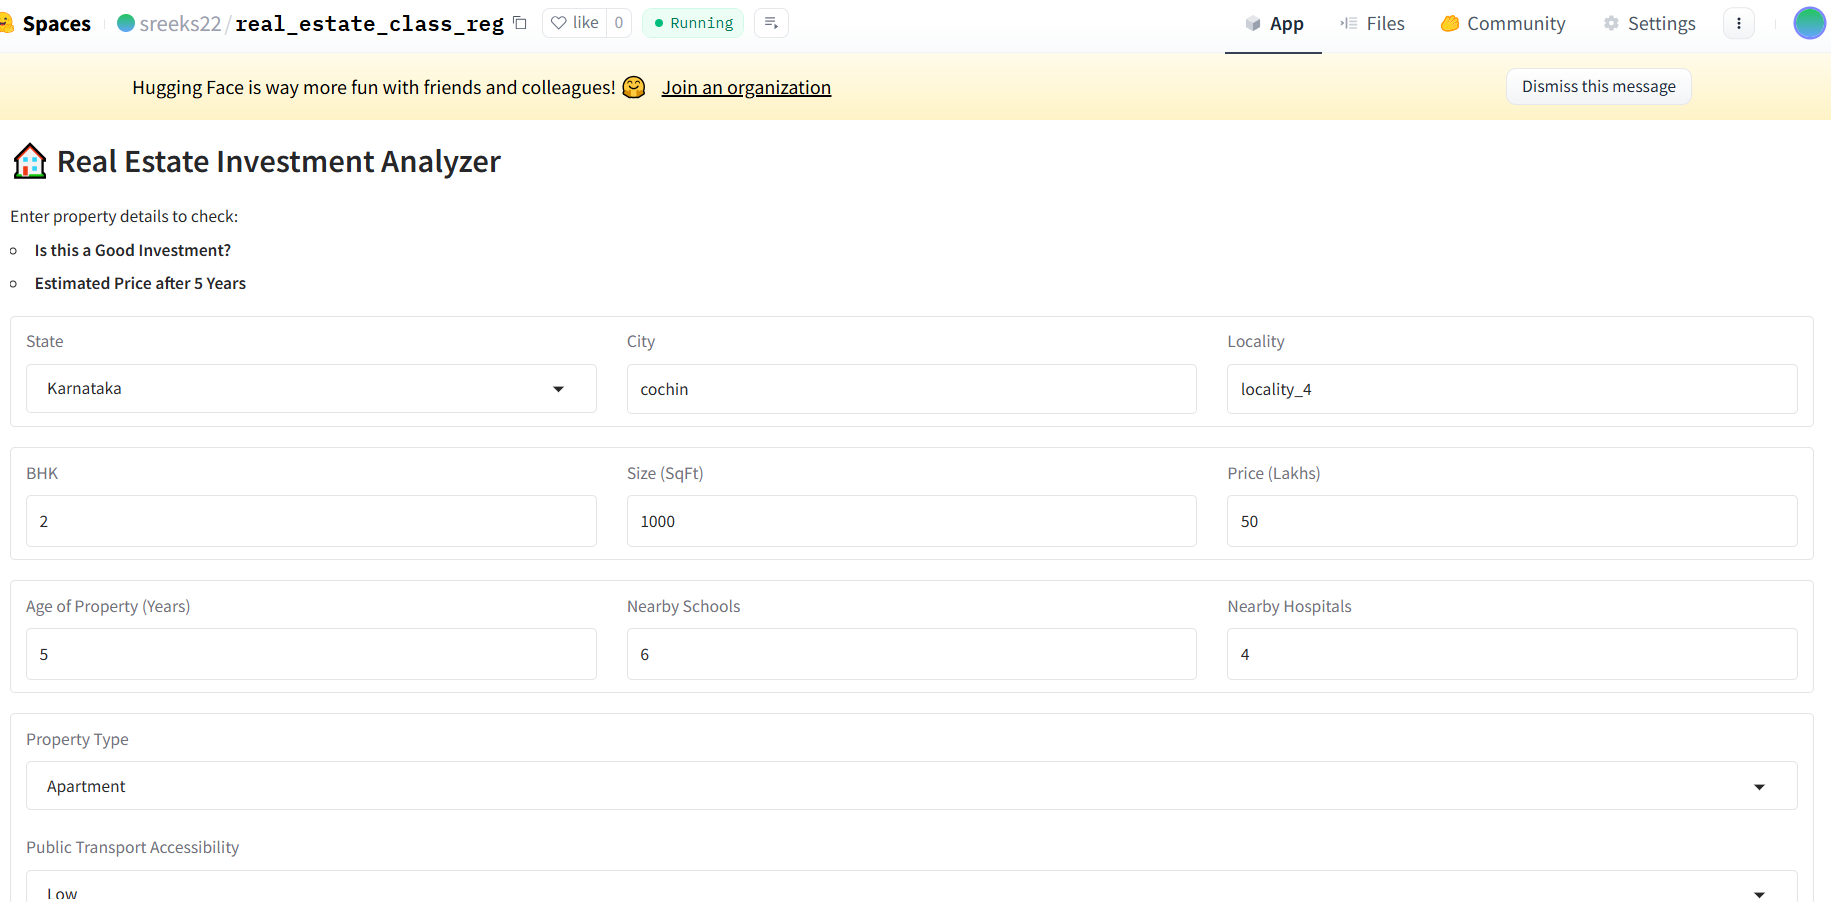

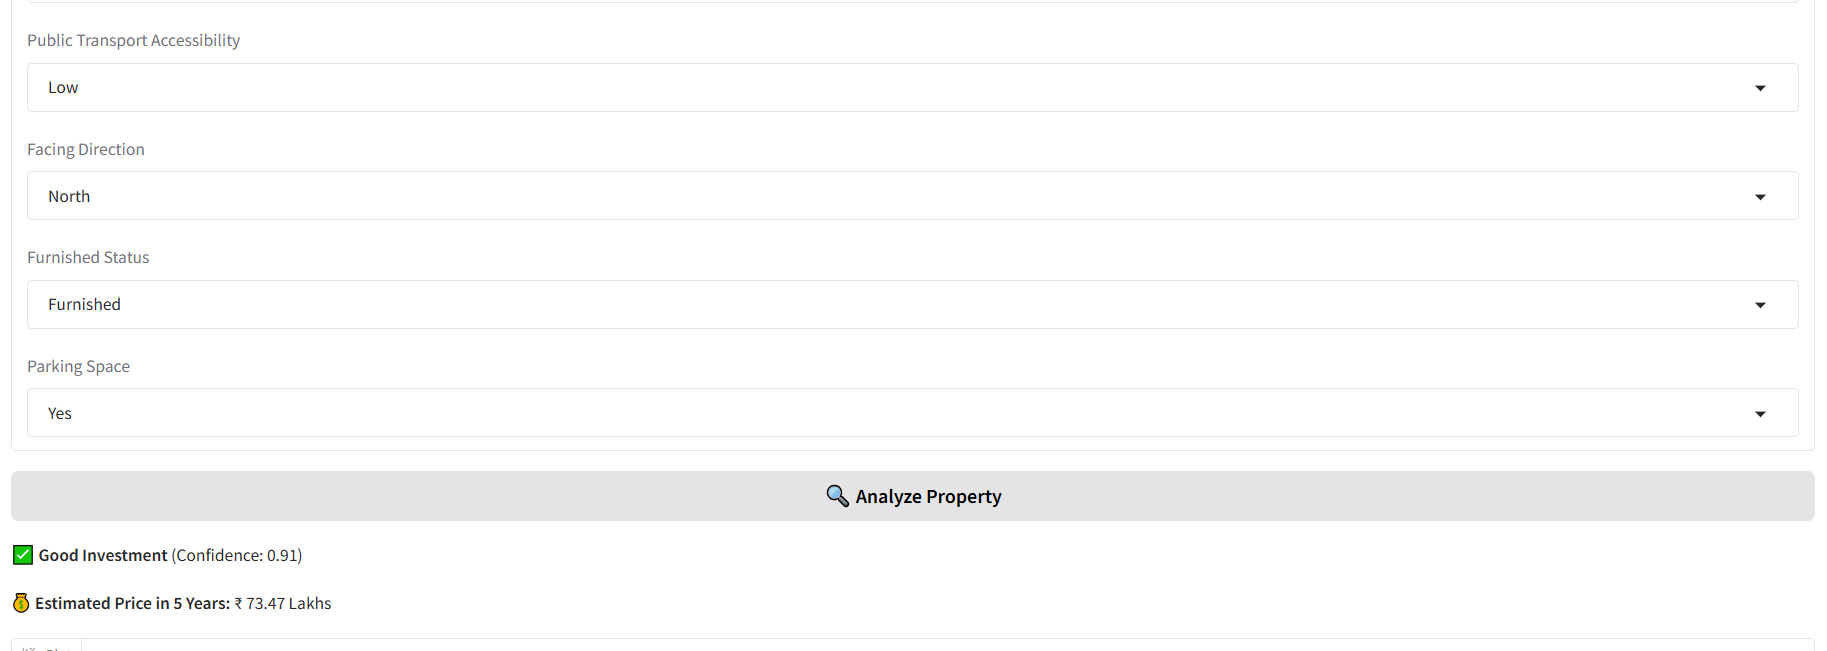

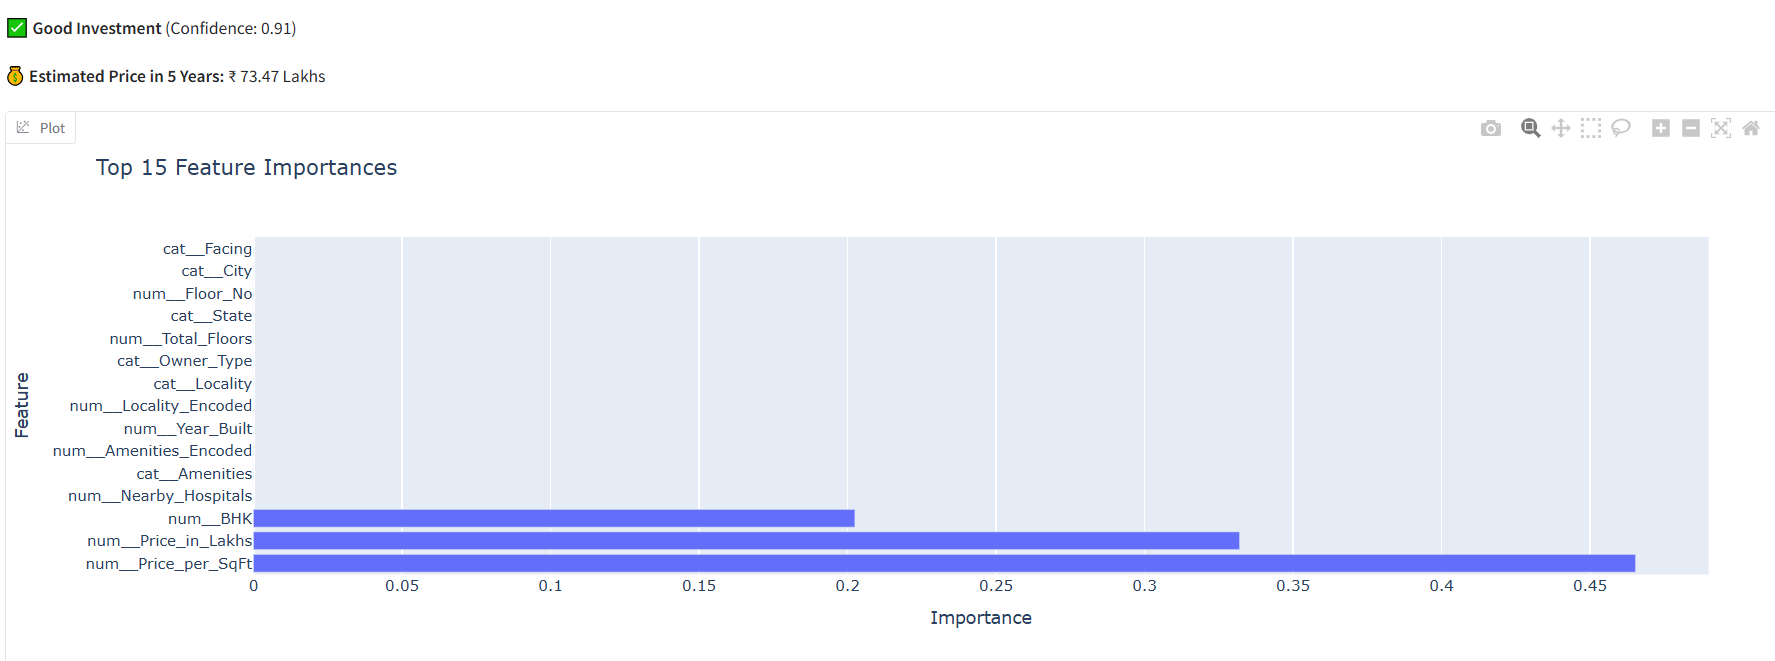